# HSIC

In this notebook, I will be looking at HSIC and replicating some MATLAB code found [here](). There are 3 main functions:
* HSIC
* HSIC Derivative
* Randomized HSIC Derivative

In [1]:
import sys
sys.path.insert(0, '/home/emmanuel/code/kernellib')
from kernellib.dependence import HSIC, RHSIC
import numpy as np
import numba
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.utils.validation import check_array
from sklearn.preprocessing import KernelCenterer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import check_random_state

from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Parameters

In [2]:
np.random.seed(1234)

num_points = 1000

kernel = RBF()

num_rand_features = 50

## Toy Data

In [3]:
# High Correlation, High Dependence
x1 = np.random.rand(num_points, 1)

y1 = x1 + 0.1 * np.random.randn(num_points, 1)

# Low Correlation, High Dependence
t = 2 * np.pi * np.random.rand(num_points, 1)

x2 = np.cos(t) + 0.1 * np.random.randn(num_points, 1)
y2 = np.sin(t) + 0.1 * np.random.randn(num_points, 1)

# Low Correlation, Low Dependence
x3 = np.random.rand(num_points, 1)
y3 = np.random.rand(num_points, 1)

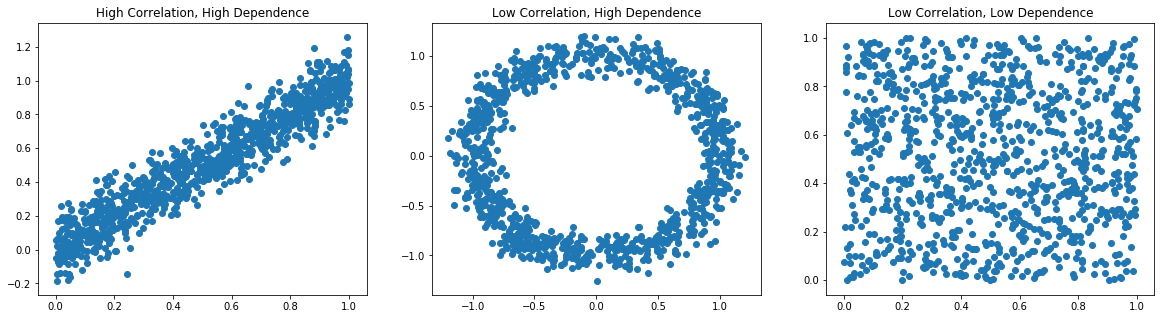

In [4]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

ax[0].scatter(x1, y1)
ax[0].set_title('High Correlation, High Dependence')

ax[1].scatter(x2, y2)
ax[1].set_title('Low Correlation, High Dependence')

ax[2].scatter(x3, y3)
ax[2].set_title('Low Correlation, Low Dependence')

plt.show()

## HSIC

#### Note: Einsum Speedup

In [5]:
hsic_vals = dict()
sens = dict()

In [6]:
hsic_model = HSIC(kernel='rbf', random_state=1234)

hsic_model.fit(x1, y1);

hsic_vals['hh'] = hsic_model.hsic_value
sens['hh'] = hsic_model.sensitivity()

# hsic value
print(f"HSIC (H,H): {hsic_vals['hh']}")

No derivatives found. Recalculating derivative.
HSIC (H,H): 0.10420709499567238


In [7]:
# fig, ax = plt.subplots()

# my_colors = [
#     '#ff0000', 
#     '#000000'
# ]

# cmap=LinearSegmentedColormap.from_list('mycmap', my_colors[::-1])

# ax.scatter(x1, y1, c=sens, cmap=cmap)
# ax.set_title('HSIC Sensitivity Map')
# plt.show()

In [8]:
hsic_model = HSIC(kernel='rbf', random_state=1234)

hsic_model.fit(x2, y2);

hsic_vals['lh'] = hsic_model.hsic_value

# hsic value
print(f"HSIC (L,H): {hsic_model.hsic_value}")
      
sens['lh'] = hsic_model.sensitivity()

HSIC (L,H): 0.014218970577379784
No derivatives found. Recalculating derivative.


In [9]:
hsic_model = HSIC(kernel='rbf', random_state=1234)

hsic_model.fit(x3, y3);

hsic_vals['ll'] = hsic_model.hsic_value

# hsic value
print(f"HSIC (L,L): {hsic_model.hsic_value}")
      
sens['ll'] = hsic_model.sensitivity()

HSIC (L,L): 0.00031312418116805
No derivatives found. Recalculating derivative.


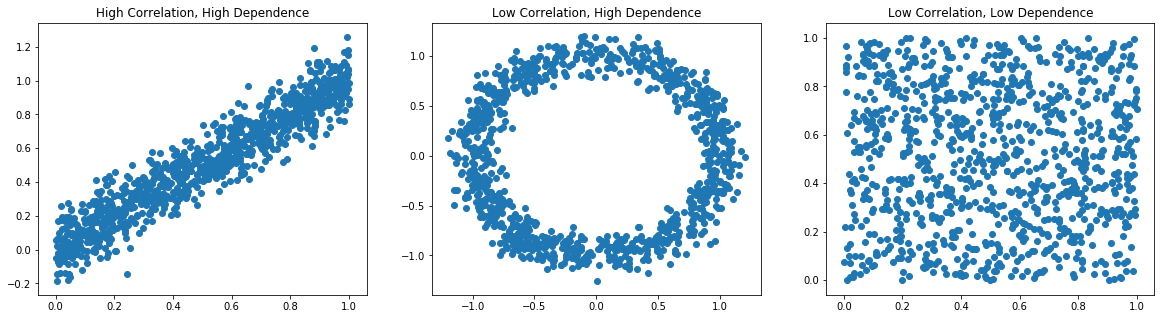

In [10]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

ax[0].scatter(x1, y1)
ax[0].set_title('High Correlation, High Dependence')

ax[1].scatter(x2, y2)
ax[1].set_title('Low Correlation, High Dependence')

ax[2].scatter(x3, y3)
ax[2].set_title('Low Correlation, Low Dependence')

plt.show()

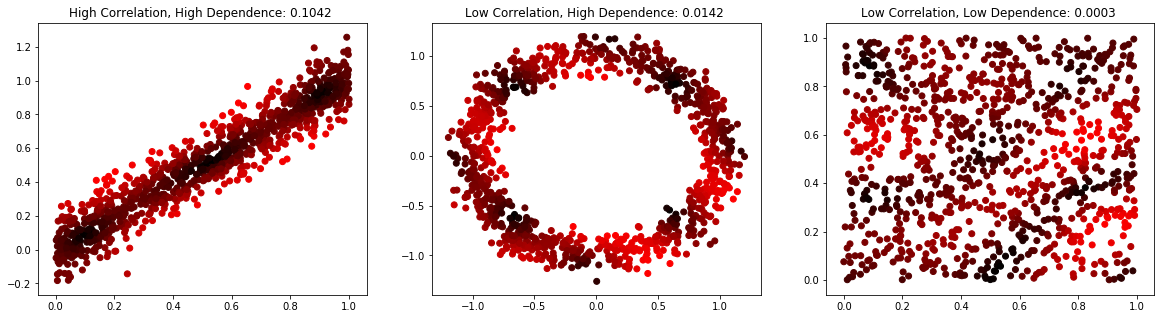

In [11]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

my_colors = [
    '#000000',
    '#ff0000', 
    
]

cmap=LinearSegmentedColormap.from_list('mycmap', my_colors)


ax[0].scatter(x1, y1, c=sens['hh'], cmap=cmap)
ax[0].set_title(f"High Correlation, High Dependence: {hsic_vals['hh']:.4f} ")

ax[1].scatter(x2, y2, c=sens['lh'], cmap=cmap)
ax[1].set_title(f"Low Correlation, High Dependence: {hsic_vals['lh']:.4f} ")

ax[2].scatter(x3, y3, c=sens['ll'], cmap=cmap)
ax[2].set_title(f"Low Correlation, Low Dependence: {hsic_vals['ll']:.4f} ")

plt.show()

## Randomized HSIC

In [21]:
rhsic_model = RHSIC(kernel='rbf', n_features=100, random_state=1234)

rhsic_model.fit(x1, y1);

hsic_vals['rhh'] = rhsic_model.hsic_value
derX, derY = rhsic_model.derivative()
sens['rhh'] = rhsic_model.sensitivity()

# hsic value
print(f"RHSIC (H,H): {rhsic_model.hsic_value:.4f}")

RHSIC (H,H): 0.0130


In [22]:
rhsic_model = RHSIC(kernel='rbf', n_features=50, random_state=1234)

rhsic_model.fit(x2, y2);

# hsic_vals['hh']  = 
hsic_vals['rlh'] = rhsic_model.hsic_value
sens['rlh'] = rhsic_model.sensitivity()

# hsic value
print(f"RHSIC (H,H): {rhsic_model.hsic_value:.4f}")

No derivatives found. Recalculating derivative.
RHSIC (H,H): 0.0145


In [23]:
rhsic_model = RHSIC(kernel='rbf', n_features=50, random_state=1234)

rhsic_model.fit(x3, y3);

# hsic_vals['hh']  = 
hsic_vals['rll'] = rhsic_model.hsic_value
sens['rll'] = rhsic_model.sensitivity()

# hsic value
print(f"RHSIC (H,H): {rhsic_model.hsic_value:.4f}")

No derivatives found. Recalculating derivative.
RHSIC (H,H): -0.0000


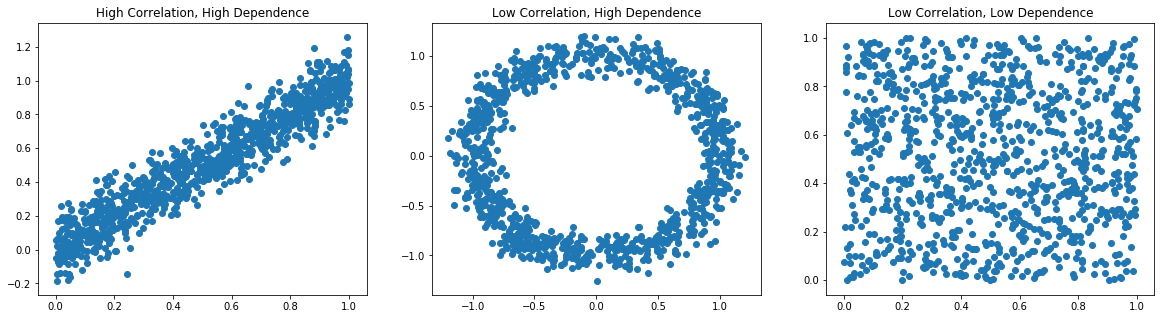

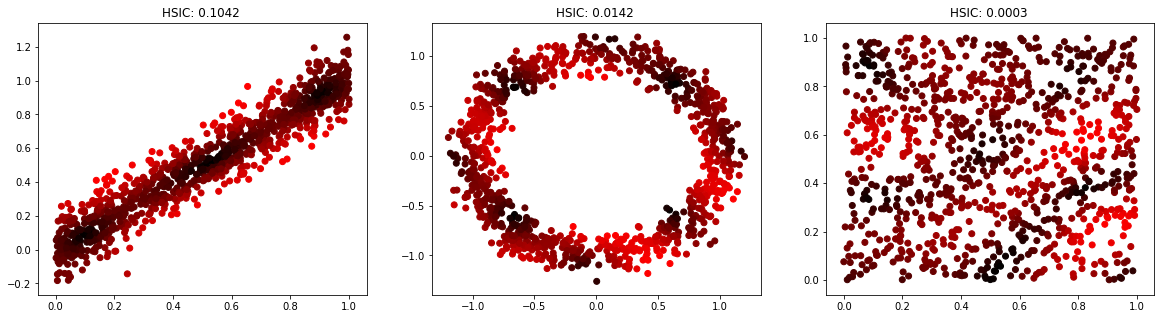

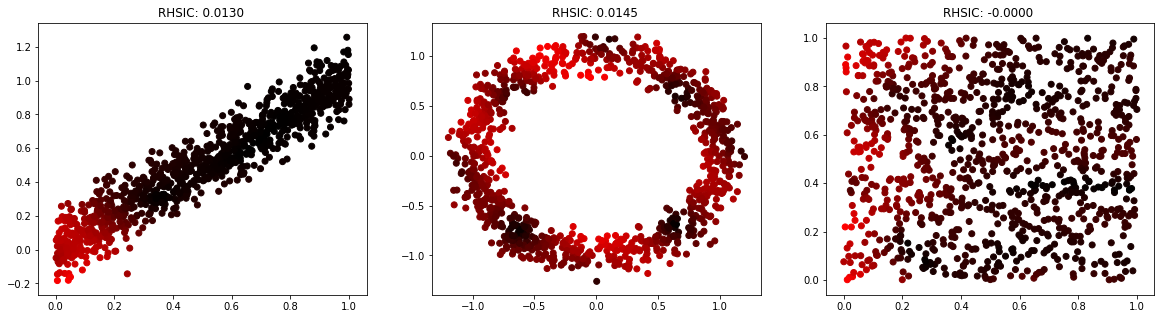

In [27]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

ax[0].scatter(x1, y1)
ax[0].set_title('High Correlation, High Dependence')

ax[1].scatter(x2, y2)
ax[1].set_title('Low Correlation, High Dependence')

ax[2].scatter(x3, y3)
ax[2].set_title('Low Correlation, Low Dependence')

plt.show()

fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

my_colors = [
    '#000000',
    '#ff0000', 
    
]

cmap=LinearSegmentedColormap.from_list('mycmap', my_colors)


ax[0].scatter(x1, y1, c=sens['hh'], cmap=cmap)
ax[0].set_title(f"HSIC: {hsic_vals['hh']:.4f} ")

ax[1].scatter(x2, y2, c=sens['lh'], cmap=cmap)
ax[1].set_title(f"HSIC: {hsic_vals['lh']:.4f} ")

ax[2].scatter(x3, y3, c=sens['ll'], cmap=cmap)
ax[2].set_title(f"HSIC: {hsic_vals['ll']:.4f} ")

plt.show()

fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

my_colors = [
    '#000000',
    '#ff0000', 
]

cmap=LinearSegmentedColormap.from_list('mycmap', my_colors)


ax[0].scatter(x1, y1, c=sens['rhh'], cmap=cmap)
ax[0].set_title(f"RHSIC: {hsic_vals['rhh']:.4f} ")

ax[1].scatter(x2, y2, c=sens['rlh'], cmap=cmap)
ax[1].set_title(f"RHSIC: {hsic_vals['rlh']:.4f} ")

ax[2].scatter(x3, y3, c=sens['rll'], cmap=cmap)
ax[2].set_title(f"RHSIC: {hsic_vals['rll']:.4f} ")

plt.show()